In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
import glob
from tqdm import tqdm

# Tweet Sentiment Score with Vader Sentiment

tweet from 2020 - 2021
Sinovac vaccine

In [3]:
# calculate sentiment score
def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    return sentiment_dict

In [4]:
# merge all csv
path = r"translate\sinovac"
all_files = glob.glob(path + "/*.csv")
list = []

for filename in all_files:
    df = pd.read_csv(filename, header=None)
    list.append(df)

frame = pd.concat(list, axis=0, ignore_index=True)

In [5]:
# calculate all tweet sentiment score
result = []

for idx, tweet in tqdm(enumerate(frame[4])):
    result.append(sentiment_scores(tweet))

df_result = pd.DataFrame(result)
df_result.head()

131899it [21:53, 100.43it/s]


,neg,neu,pos,compound
0,0.000,0.892,0.108,0.4404
1,0.000,1.000,0.000,0.0000
2,0.000,1.000,0.000,0.0000
3,0.045,0.904,0.050,0.0772
4,0.045,0.904,0.050,0.0772


In [6]:
# save the result
df_result.to_csv('sinovac_sentimen_result.csv',header=False)

In [7]:
# calculate overall score
df_result["overall"] = 0 # neutral
df_result.loc[df_result["compound"] >= 0.05, 'overall'] = 1 # positive
df_result.loc[df_result["compound"] <= -0.05, 'overall'] = -1 # negative
df_result.head()

,neg,neu,pos,compound,overall
0,0.000,0.892,0.108,0.4404,1
1,0.000,1.000,0.000,0.0000,0
2,0.000,1.000,0.000,0.0000,0
3,0.045,0.904,0.050,0.0772,1
4,0.045,0.904,0.050,0.0772,1


In [8]:
df_result["overall"].value_counts()

 0    58644
 1    50964
-1    22291
Name: overall, dtype: int64

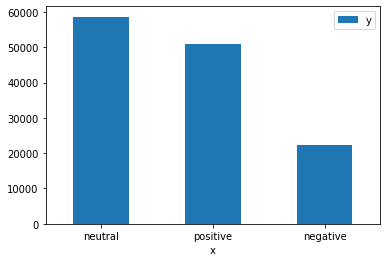

In [9]:
df_plot = pd.DataFrame(df_result.overall.value_counts().reset_index().values, columns=["x", "y"])
df_plot = df_plot.sort_index(axis = 0, ascending=True)
df_plot['x'] = df_plot.x.map({1 : 'positive', 0 : 'neutral', -1 : 'negative'})
ax = df_plot.plot.bar(x='x', y='y', rot=0)

In [10]:
# create full result
if len(df_result) == len(frame):
    df_full_result = pd.concat([frame, df_result], axis=1)
    df_full_result.head()
else:
    raise Exception("data not in the same length")

In [11]:
df_full_result.to_csv('sinovac_full.csv',header=False)

In [12]:
df_full_result.dtypes

0             int64
1            object
2             int64
3            object
4            object
5            object
6            object
7            object
8            object
9            object
10           object
11           object
12           object
13           object
neg         float64
neu         float64
pos         float64
compound    float64
overall       int64
dtype: object

In [13]:
df_full_result[1] = pd.to_datetime(df_full_result[1])
df_full_result[1].dtypes

datetime64[ns, UTC]

In [14]:
df_full_result.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,neg,neu,pos,compound,overall
0,1300574220527628288,2020-08-31 23:20:32+00:00,18129942,in,Director of Bio Farma Honesti Basyir said the ...,Indonesia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.892,0.108,0.4404,1
1,1300470239646285828,2020-08-31 16:27:21+00:00,1274695735951241216,in,Last August 25 Erick Thohir and Foreign Minist...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,1.000,0.000,0.0000,0
2,1300465569129398273,2020-08-31 16:08:47+00:00,1153912473298206721,in,The research team called as many as 248 volunt...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,1.000,0.000,0.0000,0
3,1300448878462816257,2020-08-31 15:02:28+00:00,754980910366232578,in,* Approximately the President or the House of ...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.045,0.904,0.050,0.0772,1
4,1300448317269143553,2020-08-31 15:00:14+00:00,761550431625412609,in,* Approximately the President or the House of ...,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.045,0.904,0.050,0.0772,1


In [15]:
df_date_result = df_full_result[[1,"overall"]]

In [16]:
# monthly tweet count
df_date_result.groupby([df_date_result[1].dt.year, df_date_result[1].dt.month])['overall'].size().to_csv('banyak_tweet_perbulan_sinovac.csv',header=False)
df_date_result.groupby([df_date_result[1].dt.year, df_date_result[1].dt.month])['overall'].size()

1     1 
2020  4        22
      5        26
      6        45
      7      1359
      8      2210
      9      1270
      10     1221
      11     1330
      12     9184
2021  1     33487
      2      6691
      3      5654
      4      3319
      5      4050
      6     10458
      7     18251
      8     12062
      9      7943
      10     4576
      11     5148
      12     3593
Name: overall, dtype: int64

In [17]:
# monthly overall count
pd.set_option('display.max_rows', None)
df_date_result.groupby([df_date_result[1].dt.year, df_date_result[1].dt.month, "overall"]).size().to_csv('banyak_sentimen_perbulan_sinovac.csv',header=False)
df_date_result.groupby([df_date_result[1].dt.year, df_date_result[1].dt.month, "overall"]).size()

1     1   overall
2020  4    0             6
           1            16
      5   -1             2
           0            10
           1            14
      6   -1             4
           0            18
           1            23
      7   -1           103
           0           791
           1           465
      8   -1           204
           0          1086
           1           920
      9   -1           192
           0           447
           1           631
      10  -1           200
           0           611
           1           410
      11  -1           333
           0           490
           1           507
      12  -1          1548
           0          4156
           1          3480
2021  1   -1          5135
           0         15984
           1         12368
      2   -1          1117
           0          3280
           1          2294
      3   -1           725
           0          3071
           1          1858
      4   -1           511
          